In [1]:
import sys
import pandas as pd
import matplotlib

In [2]:
sys.path.append('../scripts/')

import defaults as defs
# import dataCleaner as dc
# import dataVisualizer as dv
# cleaner = dc.dataCleaner('initial observation')
# visualizer = dv.dataVisualizer('initial observation')

In [3]:
df = pd.read_csv('../observations/structure.csv')

In [4]:
df[:7]

,Assets,number_of_files,all_files,concat
0,ed3071a667a11cc56e88ae0489bfe6aa,28,"['video.mp4', 'fs-click-endframe.png', 'rev-vi...",video.mp4 fs-click-endframe.png rev-video-cta-...
1,4799763419d621cd41e7fb8abbcdd45d,17,"['thumbnail.jpg', 'landing_2.jpg', 'video.mp4'...",thumbnail.jpg landing_2.jpg video.mp4 MPU-clic...
2,bf1f7af46eec0e92939a8b3ba51cbacd,46,"['f2-bg.png', 'f3-cta-rev-4.png', 'Line 1.png'...",f2-bg.png f3-cta-rev-4.png Line 1.png logo.png...
3,e68e20f592457b875ce29757ab855dfe,15,"['endtext.png', 'thumbnail.jpg', 'landing_2.jp...",endtext.png thumbnail.jpg landing_2.jpg endfra...
4,6a8e741867d4f893afad015b77b52c39,16,"['landing_2.jpg', 'video.mp4', 'cta.png', 'end...",landing_2.jpg video.mp4 cta.png end-1.jpg thum...
5,65299151bf4cbd1825d28e4a43d113ac,6,"['video.mp4', 'MPU-swipe-layer2.png', 'engagem...",video.mp4 MPU-swipe-layer2.png engagement_anim...
6,42c5b4b367187c29ac8fdd78c70837d6,24,"['logo.png', 'arrowdown.png', 'star24.png', 's...",logo.png arrowdown.png star24.png star33e.png ...


* Varying file numbers observed

In [5]:
print(df['number_of_files'].min(), df['number_of_files'].max(), df['number_of_files'].mean())

0 175 18.6939226519337


* Number of files range between 0 and 175, with the average being around 19

<AxesSubplot:>

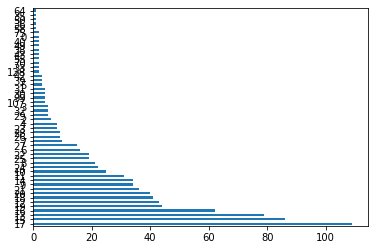

In [6]:
df['number_of_files'].value_counts()[:50].plot(kind='barh')